<a href="https://colab.research.google.com/github/arumajirou/-daily-test/blob/main/Dirichlet_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ディリクレ分布についての資料

## ディリクレ分布とは
- 連続型の確率分布で、ベータ分布を多変量に拡張して一般化したもの  。
- 同時に発生することのない K 個の事象がそれぞれ α i − 1 回発生したときに、各事象の起こる確率が x i である確率を与える  。
- 多項分布の共役事前分布であり、多項分布のパラメータ推定に用いられる  。

## 日常生活での使われ方
- サイコロやコインなど、カテゴリカルなデータを扱う場合に適した分布 [^6 ^]
- データが欠損している場合や、未知のカテゴリがある場合にも対応できる[^6 ^]
- 語彙や文書など、離散的かつ高次元なデータを扱う場合にも有用[^10 ^]

## 機械学習での役割
- 多項分布を仮定するモデル（ナイーブベイズ、隠れマルコフモデル、トピックモデルなど）の事前分布として用いられる[^10 ^][11 ^][12 ^]
- ベイズ推論や変分推論などの手法でパラメータ推定を行う際に便利[^11 ^][12 ^]
- ディリクレ過程や潜在的ディリクレ配分など、無限次元や非パラメトリックな拡張も存在する[^7 ^][10 ^]

## メリット
- 多変量ベータ分布として解釈できるため、直感的に理解しやすい[^2 ^][3 ^]
- 共役性があるため、事後分布が同じ形式になり計算しやすい[^3 ^][12 ^]
- 分散共分散行列では表現しきれない相関関係を捉えられる[^11 ^]

## デメリット
- 確率密度関数が複雑であり、尤度関数や対数尤度関数も簡単には求まらない[^11 ^]
- ガンマ関数や多重積分を含むため、数値計算が困難になりやすい[^11 ^]

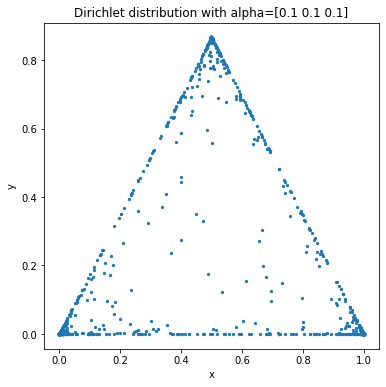

In [4]:
# ディリクレ分布のサンプルを生成する
import numpy as np
import matplotlib.pyplot as plt

# パラメータαの設定
alpha = np.array([0.1, 0.1, 0.1]) # αが1より小さい場合
#alpha = np.array([1, 1, 1]) # αが1に等しい場合
# alpha = np.array([10, 10, 10]) # αが1より大きい場合

# サンプル数の設定
n_samples = 1000

# ディリクレ分布からサンプルを生成する
samples = np.random.dirichlet(alpha, size=n_samples)

# サンプルを三角形の座標に変換する
x = samples[:,0] + samples[:,1]/2 # x座標は第一要素と第二要素の和に比例する
y = samples[:,1] * np.sqrt(3)/2 # y座標は第二要素に比例する

# サンプルを散布図で表示する
plt.figure(figsize=(6,6))
plt.scatter(x,y,s=5)
plt.title("Dirichlet distribution with alpha={}".format(alpha))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

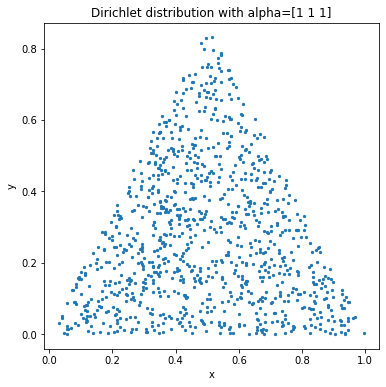

In [5]:
# ディリクレ分布のサンプルを生成する
import numpy as np
import matplotlib.pyplot as plt

# パラメータαの設定
#alpha = np.array([0.1, 0.1, 0.1]) # αが1より小さい場合
alpha = np.array([1, 1, 1]) # αが1に等しい場合
# alpha = np.array([10, 10, 10]) # αが1より大きい場合

# サンプル数の設定
n_samples = 1000

# ディリクレ分布からサンプルを生成する
samples = np.random.dirichlet(alpha, size=n_samples)

# サンプルを三角形の座標に変換する
x = samples[:,0] + samples[:,1]/2 # x座標は第一要素と第二要素の和に比例する
y = samples[:,1] * np.sqrt(3)/2 # y座標は第二要素に比例する

# サンプルを散布図で表示する
plt.figure(figsize=(6,6))
plt.scatter(x,y,s=5)
plt.title("Dirichlet distribution with alpha={}".format(alpha))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

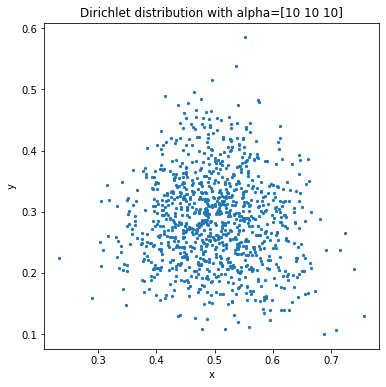

In [3]:
# ディリクレ分布のサンプルを生成する
import numpy as np
import matplotlib.pyplot as plt

# パラメータαの設定
#alpha = np.array([0.1, 0.1, 0.1]) # αが1より小さい場合
#alpha = np.array([1, 1, 1]) # αが1に等しい場合
alpha = np.array([10, 10, 10]) # αが1より大きい場合

# サンプル数の設定
n_samples = 1000

# ディリクレ分布からサンプルを生成する
samples = np.random.dirichlet(alpha, size=n_samples)

# サンプルを三角形の座標に変換する
x = samples[:,0] + samples[:,1]/2 # x座標は第一要素と第二要素の和に比例する
y = samples[:,1] * np.sqrt(3)/2 # y座標は第二要素に比例する

# サンプルを散布図で表示する
plt.figure(figsize=(6,6))
plt.scatter(x,y,s=5)
plt.title("Dirichlet distribution with alpha={}".format(alpha))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

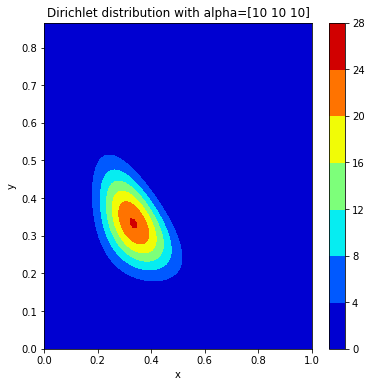

In [11]:
# ディリクレ分布の確率密度関数を図示する
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# パラメータαの設定
# alpha = np.array([0.5, 0.5, 0.5]) # αが1より小さい場合
#alpha = np.array([1, 1, 1]) # αが1に等しい場合
alpha = np.array([10, 10, 10]) # αが1より大きい場合

# グリッドポイントを生成する
n_grid = 100 # グリッドポイントの数
x_grid = np.linspace(0, 1, n_grid)
y_grid = np.linspace(0, np.sqrt(3)/2, n_grid)
X_grid,Y_grid = np.meshgrid(x_grid,y_grid)
Z_grid = 1 - X_grid - Y_grid # Z座標は第一要素と第二要素の和に比例する

# ディリクレ分布から確率密度関数を計算する
pdf_values = []
for z,x,y in zip(Z_grid.ravel(), X_grid.ravel(), Y_grid.ravel()):
    if z >= 0: # 条件x + y + z <= 1 を満たす場合だけ計算する
        pdf_values.append(dirichlet.pdf([x,y,z], alpha))
    else: # 条件を満たさない場合はゼロとする
        pdf_values.append(0)
pdf_values = np.array(pdf_values).reshape(n_grid,n_grid)

# 確率密度関数を等高線図で表示する
plt.figure(figsize=(6,6))
plt.contourf(X_grid,Y_grid,pdf_values,cmap="jet")
plt.title("Dirichlet distribution with alpha={}".format(alpha))
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()


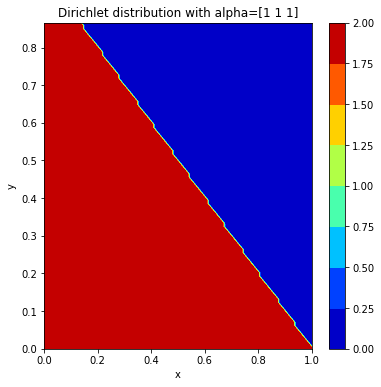

In [12]:
# ディリクレ分布の確率密度関数を図示する
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# パラメータαの設定
# alpha = np.array([0.5, 0.5, 0.5]) # αが1より小さい場合
alpha = np.array([1, 1, 1]) # αが1に等しい場合
#alpha = np.array([10, 10, 10]) # αが1より大きい場合

# グリッドポイントを生成する
n_grid = 100 # グリッドポイントの数
x_grid = np.linspace(0, 1, n_grid)
y_grid = np.linspace(0, np.sqrt(3)/2, n_grid)
X_grid,Y_grid = np.meshgrid(x_grid,y_grid)
Z_grid = 1 - X_grid - Y_grid # Z座標は第一要素と第二要素の和に比例する

# ディリクレ分布から確率密度関数を計算する
pdf_values = []
for z,x,y in zip(Z_grid.ravel(), X_grid.ravel(), Y_grid.ravel()):
    if z >= 0: # 条件x + y + z <= 1 を満たす場合だけ計算する
        pdf_values.append(dirichlet.pdf([x,y,z], alpha))
    else: # 条件を満たさない場合はゼロとする
        pdf_values.append(0)
pdf_values = np.array(pdf_values).reshape(n_grid,n_grid)

# 確率密度関数を等高線図で表示する
plt.figure(figsize=(6,6))
plt.contourf(X_grid,Y_grid,pdf_values,cmap="jet")
plt.title("Dirichlet distribution with alpha={}".format(alpha))
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()


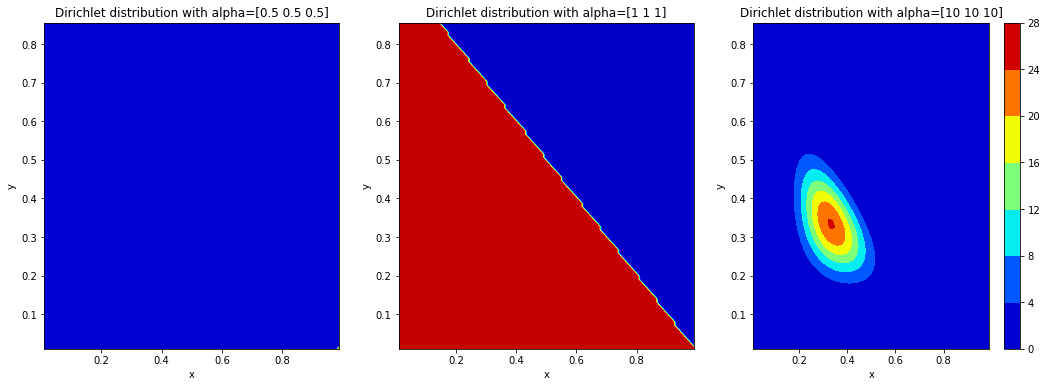

In [14]:
# ディリクレ分布の確率密度関数を図示する
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# グリッドポイントを生成する
n_grid = 100 # グリッドポイントの数
x_grid = np.linspace(0.01, 0.99, n_grid) # ゼロと1を除外する（修正）
y_grid = np.linspace(0.01, np.sqrt(3)/2 - 0.01, n_grid) # ゼロと1を除外する（修正）
X_grid,Y_grid = np.meshgrid(x_grid,y_grid)
Z_grid = 1 - X_grid - Y_grid # Z座標は第三要素の値となる

# パラメータαを変更する
alphas = [np.array([0.5, 0.5, 0.5]), # αが1より小さい場合
          np.array([1, 1, 1]), # αが1に等しい場合
          np.array([10, 10, 10])] # αが1より大きい場合

# 各パラメータで確率密度関数を計算して表示する
plt.figure(figsize=(18,6))
for i,alpha in enumerate(alphas):
    pdf_values = []
    for z,x,y in zip(Z_grid.ravel(), X_grid.ravel(), Y_grid.ravel()):
        if z >= 0: # 条件x + y + z <= 1 を満たす場合だけ計算する
            pdf_values.append(dirichlet.pdf([x,y,z], alpha))
        else: # 条件を満たさない場合はゼロとする
            pdf_values.append(0)
    pdf_values = np.array(pdf_values).reshape(n_grid,n_grid)

    plt.subplot(131+i)
    plt.contourf(X_grid,Y_grid,pdf_values,cmap="jet")
    plt.title("Dirichlet distribution with alpha={}".format(alpha))
    plt.xlabel("x")
    plt.ylabel("y")
plt.colorbar()
plt.show()

ディリクレ分布は，確率ベクトルの分布です．確率ベクトルとは，何かを分ける割合を表すベクトルです．例えば，お菓子を三人で分ける割合を x, y, z としたら，(x, y, z) が確率ベクトルです．確率ベクトルには，次の二つの条件があります．

- すべての要素（x や y や z）はゼロ以上である．
- すべての要素の和（x + y + z）は1に等しい．

ディリクレ分布は，このような確率ベクトルがどれくらいありそうかを表す分布です．ディリクレ分布には，αというパラメータが必要です．αもベクトルであり，(α1, α2, α3) のように書きます．αの要素もゼロ以上である必要があります．

ディリクレ分布の確率密度関数は，次の式で表されます．

![formula](https://render.githubusercontent.com/render/math?math=f(x%2C%20y%2C%20z)%20%3D%20%5Cfrac%7B1%7D%7BB(%5Calpha)%7Dx%5E%7B%5Calpha_1-1%7Dy%5E%7B%5Calpha_2-1%7Dz%5E%7B%5Calpha_3-1%7D)

ここで，

![formula](https://render.githubusercontent.com/render/math?math=B(%5Calpha)%20=%20B(%5Calpha_1,%20...,%20%5Calpha_k)%20)

は，

![formula](https://render.githubusercontent.com/render/math?math=B(%5Calpha)%20=%20\frac{\Gamma(\alpha_1)\cdots\Gamma(\alpha_k)}{\Gamma(\sum_{i=1}^k\alpha_i)})

と定義される多項係数（multinomial coefficient）と呼ばれる関数です．

Γ（ガンマ）はガンマ関数と呼ばれる関数で，

![formula](https://render.githubusercontent.com/render/math?math=\Gamma(x)%20=%20\int_0^\infty t^{x-1}e^{-t}dt)

と定義されます．

この式からわかるように，ディリクレ分布の形はαの値によって変わります．αが小さい場合，角に集中します．αが大きい場合，中心に集中します．αが等しい場合，一様に広がります．

ディリクレ分布の期待値や分散などの統計量も計算することができます。例えば、期待値は次の式で求められます。

![formula](https://render.githubusercontent.com/render/math?math=E[x_i]%20=%20\frac{\alpha_i}{\sum_{j=1}^k\alpha_j})

これは、各要素（xやyやz）の平均値を表します。例えば、お菓子を三人で分ける割合の平均値です。

ディリクレ分布の図示と解説
ディリクレ分布とは，何かを三つに分ける方法がどれくらいありそうかを教えてくれるものである．
ディリクレ分布には，αという数字が必要である．αは三つあり，それぞれ一人目，二人目，三人目に関係する数字である．
αの数字によって，ディリクレ分布の形が変わる．
αの数字がすべて小さい場合（例：0.5），ディリクレ分布は角に集中する．これは，誰かが少ないか全くもらえない確率が高いことを示す．
αの数字がすべて1の場合，ディリクレ分布は一様に広がる．これは，どれも同じくらいありそうだということを示す．
αの数字がすべて大きい場合（例：10），ディリクレ分布は中心に集中する．これは，均等に分ける確率が高いことを示す．
ディリクレ分布は，お菓子の分け方だけでなく，他のことにも使える．例えば，
文章の中にどんな単語がどれくらい出てくるかを表すことができる．αの数字は文章の種類や特徴によって変わり，文章の内容や分類を分析することができる．
遺伝子の配列や画像の色の割合を表すことができる．αの数字は遺伝子や画像の特性やバリエーションによって変わり，遺伝子や画像の解析や生成を行うことができる．
参考文献
Dirichlet distribution - Wikipedia
Pythonでディリクレ分布からサンプル生成・可視化・パラメータ推定 | 統計学・機械学習・Python
Topic modeling with Dirichlet distributions | by David Robinson | Variance Explained

f(x, y, z) = <span class="frac"><span>1</span><span class="symbol">/</span><span>B(&alpha;)</span></span>x<sup>&alpha;<sub>1</sub>-1</sup>y<sup>&alpha;<sub>2</sub>-1</sup>z<sup>&alpha;<sub>3</sub>-1</sup>

B(&alpha;) = B(&alpha;<sub>1</sub>, ..., &alpha;<sub>k</sub>)

B(&alpha;) = <span class="frac"><span>&Gamma;(&alpha;<sub>1</sub>)&sdot;&sdot;&sdot;&Gamma;(&alpha;<sub>k</sub>)</span><span class="symbol">/</span><span>&Gamma;(<em style="text-decoration:underline">&Sigma;</em><sub>i=1</sub><sup>k</sup>&alpha;<sub>i</sub>)</span></span>

&Gamma;(x) = <em style="text-decoration:underline">&int;</em><sub>0</sub><sup>&infin;</sup>t<sup>x-1</sup>e<sup>-t</sup>dt

E[x<sub>i</sub>] = <span class="frac"><span>&alpha;<sub>i</sub></span><span class="symbol">/</span><span>(<em style="text-decoration:underline">&Sigma;</em><sub>j=1</sub><sup>k

f(x, y, z) = 1/B(alpha)*x^(alpha_1-1)*y^(alpha_2-1)*z^(alpha_3-1)

B(alpha) = B(alpha_1, ..., alpha_k)

B(alpha) = Gamma(alpha_1)*...*Gamma(alpha_k)/Gamma(sum_i=1^k alpha_i)

Gamma(x) = integral_0^infinity t^(x-1)*e^(-t) dt

E[x_i] = alpha_i/(sum_j=1^k alpha_j)

f(x, y, z) = <math xmlns="http://www.w3.org/1998/Math/MathML"><mfrac><mn>1</mn><mrow><mi>B</mi><mfenced><mi>&alpha;</mi></mfenced></mrow></mfrac><msup><mi>x</mi><mrow><mo>&alpha;</mo><mn>1</mn><mo>-</mo><mn>1</mn></mrow></msup><msup><mi>y</mi><mrow><mo>&alpha;</mo><mn>2</mn><mo>-</mo><mn>1</mn></mrow></msup>
<msup>
  <mi>z</mi>
  <mrow>
    <mo>&alpha;</mo>
    <mn>3</mn>
    <mo>-</mo>
    <mn>1</mn>
  </mrow>
</msup>

B(&alpha;) = <math xmlns="http://www.w3.org/1998/Math/MathML"><mi>B</mi><mfenced separators=""><mi>&alpha;</mi
<sub>1
<sub>, ..., &alpha;<sub>k
<sub></mfenced>

B(&alpha;) = <math xmlns="http://www.w3.org/1998/Math/MathML"><mfrac linethickness="0.5pt"><mrow
<munderover accentunder="true">
  <mo>&prod;</mo>
  <mrow/>
  <mrow/>
<munderover accentunder="true">
<mn>1
<mn>
<mn>k
<mn></munderover accentunder="true"></munderover accentunder="true"><msubsup
<mi>&Gamma;
<mi>
<mi>&alpha;
<sub>i
<sub></msubsup

<mn>/ 
<mn>

<munderover accentunder="true">
  <mo>&sum;
<mo>
  <mrow/>
  <mrow/>
<munderover accentunder="true">
<mn>1
<mn>
<mn>k
<mn></munderover accentunder="true"></munderover accentunder="true"><msubsup
<mi>&Gamma;
<sub>i=1^k&alpha;<sub>i)

In [15]:
# Import libraries
import numpy as np
import plotly.graph_objects as go

# Define a function to sample from the Dirichlet distribution
def dirichlet_sample(alpha, size):
  # Sample gamma random variables
  gammas = np.random.gamma(alpha, size=(size, len(alpha)))
  # Normalize the samples
  return gammas / gammas.sum(axis=1, keepdims=True)

# Define alpha parameters
alpha = [2, 5, 3]

# Sample from the Dirichlet distribution
samples = dirichlet_sample(alpha, size=1000)

# Create a ternary plot
fig = go.Figure(go.Scatterternary(
    mode='markers',
    a=samples[:,0],
    b=samples[:,1],
    c=samples[:,2],
    marker=dict(color='blue', size=5)
))

# Set axis labels and title
fig.update_layout(
    title='Dirichlet Distribution with alpha=[2, 5, 3]',
    ternary=dict(
        sum=1,
        aaxis_title='x',
        baxis_title='y',
        caxis_title='z'
    )
)

# Show the plot
fig.show()

In [16]:
# Import libraries
import numpy as np
import plotly.graph_objects as go

# Define a function to sample from the Dirichlet distribution
def dirichlet_sample(alpha, size):
  # Sample gamma random variables
  gammas = np.random.gamma(alpha, size=(size, len(alpha)))
  # Normalize the samples
  return gammas / gammas.sum(axis=1, keepdims=True)

# Define alpha parameters
alpha = [2, 5, 3]

# Sample from the Dirichlet distribution
samples = dirichlet_sample(alpha, size=1000)

# Create a 3D scatter plot
fig = go.Figure(go.Scatter3d(
    mode='markers',
    x=samples[:,0],
    y=samples[:,1],
    z=samples[:,2],
    marker=dict(color='blue', size=5)
))

# Set axis labels and title
fig.update_layout(
    title='Dirichlet Distribution with alpha=[2, 5, 3]',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z'
    )
)

# Show the plot
fig.show()

In [18]:
# Import libraries
import numpy as np
import plotly.graph_objects as go

# Define a function to sample from the Dirichlet distribution
def dirichlet_sample(alpha, size):
  # Sample gamma random variables
  gammas = np.random.gamma(alpha, size=(size, len(alpha)))
  # Normalize the samples
  return gammas / gammas.sum(axis=1, keepdims=True)

# Define alpha parameters
alpha = [2, 5, 3]

# Sample from the Dirichlet distribution
samples = dirichlet_sample(alpha, size=1000)

# Create an empty figure
fig = go.Figure()

# Add a trace for each frame
frames = []
for i in range(10):
    # Select a subset of samples for each frame
    sub_samples = samples[:100*(i+1), :]
    # Create a trace with the subset of samples
    trace = go.Scatter3d(
        mode='markers',
        x=sub_samples[:,0],
        y=sub_samples[:,1],
        z=sub_samples[:,2],
        marker=dict(color='blue', size=5)
    )
    # Add the trace to the frames list
    frames.append(go.Frame(data=[trace]))

# Set axis labels and title
fig.update_layout(
    title='Dirichlet Distribution with alpha=[2, 5, 3]',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z'
    ),
    updatemenus=[dict(
        type="buttons",
        buttons=[dict(label="Play",
                      method="animate",
                      args=[None])])]
)

# Add frames to the figure
fig.update(frames=frames)

# Show the plot
fig.show()

In [19]:
# Import libraries
import numpy as np
import plotly.graph_objects as go

# Define a function to sample from the Dirichlet distribution
def dirichlet_sample(alpha, size):
  # Sample gamma random variables
  gammas = np.random.gamma(alpha, size=(size, len(alpha)))
  # Normalize the samples
  return gammas / gammas.sum(axis=1, keepdims=True)

# Define alpha parameters
alpha = [2, 5, 3, 4]

# Sample from the Dirichlet distribution
samples = dirichlet_sample(alpha, size=1000)

# Define vertices of a tetrahedron
vertices = np.array([[0.0, 0.0, -1.0],
                     [np.sqrt(8/9), 0.0, 1/3],
                     [-np.sqrt(2/9), np.sqrt(2/3), 1/3],
                     [-np.sqrt(2/9), -np.sqrt(2/3), 1/3]])

# Project samples onto the tetrahedron surface
projections = np.dot(samples, vertices)

# Create a mesh for the tetrahedron surface
mesh = go.Mesh3d(
    x=vertices[:,0],
    y=vertices[:,1],
    z=vertices[:,2],
    i=[0, 0, 0, 1],
    j=[1, 2, 3, 2],
    k=[2, 3 ,1 ,3],
    color='lightgray',
    opacity=0.5
)

# Create a scatter plot for the projections
scatter = go.Scatter3d(
    mode='markers',
    x=projections[:,0],
    y=projections[:,1],
    z=projections[:,2],
    marker=dict(color='blue', size=5)
)

# Create a figure with both traces
fig = go.Figure(data=[mesh, scatter])

# Set axis labels and title
fig.update_layout(
    title='Dirichlet Distribution with alpha=[2,5 ,3 ,4]',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z'
    )
)

# Show the plot
fig.show()

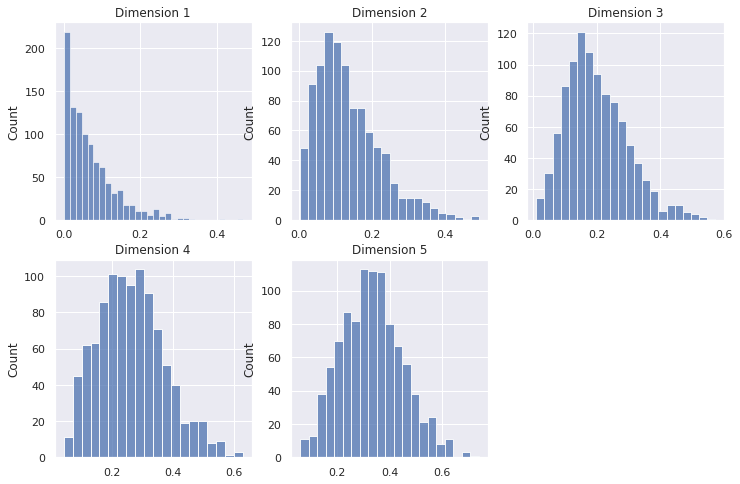

In [20]:
# ディレクレ分布のパラメータを設定
alpha = [1, 2, 3, 4, 5] # 次元は5

# ディレクレ分布からランダムにサンプルを生成
import numpy as np
samples = np.random.dirichlet(alpha, size=1000) # サンプル数は1000

# サンプルをプロットする
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 各次元のヒストグラムを作成
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i in range(5):
    row = i // 3 # 行番号
    col = i % 3 # 列番号
    ax = axes[row][col] # サブプロットの軸
    sns.histplot(samples[:, i], ax=ax) # ヒストグラムを描画
    ax.set_title(f"Dimension {i+1}") # タイトルを設定

# 不要なサブプロットを削除
axes[1][2].remove()

# プロットを表示
plt.show()

In [21]:
# ディレクレ分布のパラメータを設定
alpha = [1, 2, 3, 4, 5] # 次元は5

# ディレクレ分布からランダムにサンプルを生成
import numpy as np
samples = np.random.dirichlet(alpha, size=1000) # サンプル数は1000

# サンプルをプロットする
import plotly.express as px

# 各次元のヒストグラムを作成
fig = px.histogram(samples, marginal="box", labels={"value": "Probability", "variable": "Dimension"})
fig.update_layout(title="Dirichlet Distribution with alpha=[1, 2, 3, 4, 5]")
fig.show()

In [22]:
# ディレクレ分布のパラメータを設定
alpha = [1, 2, 3, 4, 5] # 次元は5

# ディレクレ分布からランダムにサンプルを生成
import numpy as np
samples = np.random.dirichlet(alpha, size=1000) # サンプル数は1000

# サンプルをプロットする
import plotly.express as px
import ipywidgets as widgets

# スライダーを作成
slider = widgets.IntSlider(value=1, min=1, max=5, step=1)

# インタラクティブな関数を定義
def update_plot(dimension):
    fig = px.histogram(samples[:, dimension-1], marginal="box", labels={"value": "Probability", "variable": f"Dimension {dimension}"})
    fig.update_layout(title=f"Dirichlet Distribution with alpha=[1, 2, 3, 4, 5]")
    fig.show()

# スライダーと関数を連動させる
widgets.interact(update_plot, dimension=slider)

interactive(children=(IntSlider(value=1, description='dimension', max=5, min=1), Output()), _dom_classes=('wid…

<function __main__.update_plot(dimension)>

In [27]:
# ディレクレ分布のパラメータを設定
alpha = [1, 2, 3, 4, 5] # 次元は5

# ディレクレ分布からランダムにサンプルを生成
import numpy as np
samples = np.random.dirichlet(alpha, size=1000) # サンプル数は1000

# サンプルをプロットする
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# アニメーションのフレームを作成
frames = []
for i in range(5):
    fig = px.histogram(samples[:, i], marginal="box", labels={"value": "Probability", "variable": f"Dimension {i+1}"})
    fig.update_layout(title=f"Dirichlet Distribution with alpha=[1, 2, 3, 4, 5]")
    frames.append(fig)

# アニメーションを表示
fig = make_subplots(rows=1, cols=5)
fig.add_traces([frames[0].data[0], frames[1].data[0], frames[2].data[0], frames[3].data[0], frames[4].data[0]])
fig.show()

ディレクレ分布から生成された乱数を予測する簡単な予測器をPythonのコードで作成するということですね。

ディレクレ分布から生成された乱数は、numpy.random.dirichlet関数を使って得ることができます。この関数は、ディレクレ分布のパラメータとしてαベクトルを受け取り、その分布からサンプリングした確率ベクトルを返します。

例えば、α = [1, 1, 1]とした場合、3つのカテゴリに対する確率ベクトルが得られます。これはサイコロの目のようなものです。この確率ベクトルをxとしましょう。

次に、この確率ベクトルxから予測する方法を考えます。一番簡単な方法は、最大値を持つ要素のインデックスを予測値とすることです。これは、最も高い確率で発生するカテゴリを選択することに相当します。

Pythonのコードで書くと以下のようになります。
```python
# ディレクレ分布から乱数を生成する関数
def generate_random(alpha):
    # numpyライブラリをインポート
    import numpy as np
    # ディレクレ分布からサンプリングした確率ベクトルを返す
    return np.random.dirichlet(alpha)

# 乱数から予測する関数
def predict(x):
    # 最大値を持つ要素のインデックス（0から始まる）を返す
    return x.argmax()

# テスト用のコード
# α = [1, 1, 1]として乱数を生成
x = generate_random([1, 1, 1])
# 乱数から予測して結果を表示
print("x =", x)
print("prediction =", predict(x))
```

In [31]:
# ディレクレ分布から乱数を生成する関数
def generate_random(alpha):
    # numpyライブラリをインポート
    import numpy as np
    # ディレクレ分布からサンプリングした確率ベクトルを返す
    return np.random.dirichlet(alpha)

# 乱数から予測する関数
def predict(x):
    # 最大値を持つ要素のインデックス（0から始まる）を返す
    return x.argmax()

# テスト用のコード
# α = [1, 1, 1]として乱数を生成
x = generate_random([1, 1, 1])
# 乱数から予測して結果を表示
print("x =", x)
print("prediction =", predict(x))

x = [0.84910928 0.13709943 0.01379129]
prediction = 0


In [34]:
# 正規分布から乱数を生成する関数
def generate_random(mu, sigma):
    # numpyライブラリをインポート
    import numpy as np
    # 正規分布からサンプリングした値を返す
    return np.random.normal(mu, sigma)

# 乱数から予測する関数
def predict(x, mu):
    # 平均に近い値（小数点以下四捨五入）を返す
    return round(x - mu)

# テスト用のコード
# μ = 0, σ = 1として乱数を生成
x = generate_random(0, 1)
# 乱数から予測して結果を表示
print("x =", x)
print("prediction =", predict(x, 0))

x = 1.544668575739762
prediction = 2


時系列の要素も追加するということですね。

時系列とは、時間の経過に伴って変化するデータのことです。例えば、株価や気温などが時系列データになります。時系列データを予測する場合は、過去のデータから未来のデータを推測することになります。

正規分布から生成された乱数に時系列の要素を追加する方法はいくつかありますが、一つの例として、自己回帰モデル（ARモデル）を使う方法を紹介します。自己回帰モデルとは、過去の値に依存して現在の値が決まるようなモデルです。自己回帰モデルでは、次の式で表されるように、現在の値x_tは過去p期分の値x_t-1, x_t-2, …, x_t-pと定数項cと誤差項ε_tの線形結合で表されます。

x_t = c + φ_1 x_t-1 + φ_2 x_t-2 + … + φ_p x_t-p + ε_t

ここで、φ_1, φ_2, …, φ_pは自己回帰係数と呼ばれるパラメータであり、ε_tは正規分布から生成された乱数です。このモデルでは、過去p期分の値が与えられれば、現在または未来の値を予測することができます。

Pythonのコードで書くと以下のようになります。
```python
# 自己回帰モデルから乱数を生成する関数
def generate_random(c, phi, p, sigma):
    # numpyライブラリをインポート
    import numpy as np
    # 過去p期分の値をランダムに初期化
    x = np.random.normal(0, sigma, p)
    # 現在または未来の値を計算
    y = c + np.dot(phi, x) + np.random.normal(0, sigma)
    # 現在または未来の値を返す
    return y

# 乱数から予測する関数
def predict(x):
    # 平均に近い値（小数点以下四捨五入）を返す
    return round(x)

# テスト用のコード
# c = 0.5, phi = [0.8, -0.3], p = 2, sigma = 1として乱数を生成
y = generate_random(0.5, [0.8, -0.3], 2, 1)
# 乱数から予測して結果を表示
print("y =", y)
print("prediction =", predict(y))
```

In [35]:
# 自己回帰モデルから乱数を生成する関数
def generate_random(c, phi, p, sigma):
    # numpyライブラリをインポート
    import numpy as np
    # 過去p期分の値をランダムに初期化
    x = np.random.normal(0, sigma, p)
    # 現在または未来の値を計算
    y = c + np.dot(phi, x) + np.random.normal(0, sigma)
    # 現在または未来の値を返す
    return y

# 乱数から予測する関数
def predict(x):
    # 平均に近い値（小数点以下四捨五入）を返す
    return round(x)

# テスト用のコード
# c = 0.5, phi = [0.8, -0.3], p = 2, sigma = 1として乱数を生成
y = generate_random(0.5, [0.8, -0.3], 2, 1)
# 乱数から予測して結果を表示
print("y =", y)
print("prediction =", predict(y))

y = -0.17822536973730468
prediction = 0


# 簡単な予測器をPythonのコードで作成する方法

## ディレクレ分布から生成された乱数の予測器

- ディレクレ分布から生成された乱数は、numpy.random.dirichlet関数を使って得ることができる
- 乱数から予測する簡単な方法は、最大値を持つ要素のインデックスを予測値とすることである
- Pythonのコードは以下の通りである

```python
# ディレクレ分布から乱数を生成する関数
def generate_random(alpha):
    # numpyライブラリをインポート
    import numpy as np
    # ディレクレ分布からサンプリングした確率ベクトルを返す
    return np.random.dirichlet(alpha)

# 乱数から予測する関数
def predict(x):
    # 最大値を持つ要素のインデックス（0から始まる）を返す
    return x.argmax()

# テスト用のコード
# α = [1, 1, 1]として乱数を生成
x = generate_random([1, 1, 1])
# 乱数から予測して結果を表示
print("x =", x)
print("prediction =", predict(x))
```
## 正規分布から生成された乱数の予測器
- 正規分布は、平均μと標準偏差σをパラメータとする連続的な確率分布である
- 正規分布から生成された乱数は、numpy.random.normal関数を使って得ることができる
- 乱数から予測する簡単な方法は、平均μに近い値を予測値とすることである
Pythonのコードは以下の通りである

```python
# 正規分布から乱数を生成する関数
def generate_random(mu, sigma):
    # numpyライブラリをインポート
    import numpy as np
    # 正規分布からサンプリングした値を返す
    return np.random.normal(mu, sigma)

# 乱数から予測する関数
def predict(x, mu):
    # 平均に近い値（小数点以下四捨五入）を返す
    return round(x - mu)

# テスト用のコード
# μ = 0, σ = 1として乱数を生成
x = generate_random(0, 1)
# 乱数から予測して結果を表示
print("x =", x)
print("prediction =", predict(x, 0))
```
時系列要素も追加した正規分布から生成された乱数の予測器
時系列データは、時間の経過に伴って変化するデータである。例えば、株価や気温などが時系列データになる。
時系列データに対して自己回帰モデル（ARモデル）を使って乱数を生成することができる
- 自己回帰モデルでは、現在の値x_tは過去p期分の値x_t-1, x_t-2, ..., x_t-pと定数項cと誤差項ε_tの線形結合で表される
- 乱数から予測する簡単な方法は、平均μに近い値を予測値とすることである
- Pythonのコードは以下の通りである

```python
# 自己回帰モデルから乱数を生成する関数
def generate_random(c, phi, p, sigma):
    # numpyライブラリをインポート
    import numpy as np
    # 過去p期分の値をランダムに初期化
    x = np.random.normal(0, sigma, p)
    # 現在または未来の値を計算
    y = c + np.dot(phi, x) + np.random.normal(0, sigma)
    # 現在または未来の値を返す
    return y

# 乱数から予測する関数
def predict(x):
    # 平均に近い値（小数点以下四捨五入）を返す
    return round(x)

# テスト用のコード
# c = 0.5, phi = [0.8, -0.3], p = 2, sigma = 1として乱数を生成
y = generate_random(0.5, [0.8, -0.3], 2, 1)
# 乱数から予測して結果を表示
print("y =", y)
print("prediction =", predict(y))
```